In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


create piechart from result_dict, but i want the percentages shown to be multiplied by 2

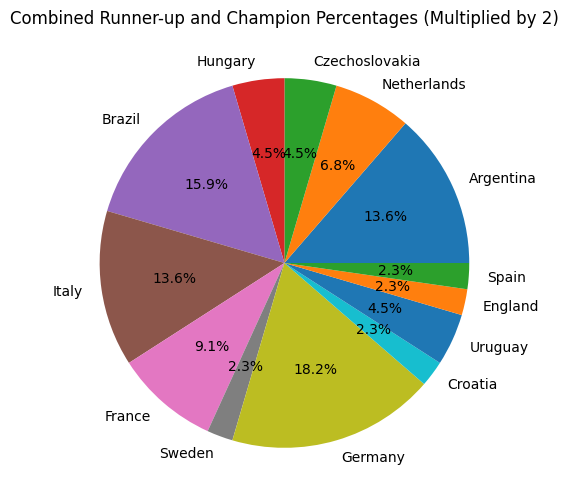

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/world_cups_data.csv')

# Calculate value counts for 'Runner-up' and 'Champion'
runner_up_counts = data["Runner-up"].value_counts()
champion_counts = data["Champion"].value_counts()

# Create a dictionary that is the sum of the value counts
result_dict = {}
for team, count in runner_up_counts.items():
    result_dict[team] = result_dict.get(team, 0) + count

for team, count in champion_counts.items():
    result_dict[team] = result_dict.get(team, 0) + count

# Combine "West Germany" and "Germany"
if "West Germany" in result_dict and "Germany" in result_dict:
    result_dict["Germany"] += result_dict.pop("West Germany")


total = sum(result_dict.values())
for team in result_dict:
    result_dict[team] = result_dict[team]/total

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(result_dict.values(), labels=result_dict.keys(), autopct='%1.1f%%')
plt.title("Combined Runner-up and Champion Percentages")
plt.show()